In [5]:
import pandas as pd
import numpy as np


In [7]:
da=pd.read_csv('heart.csv')

In [9]:
da.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
da.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [13]:
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [15]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [17]:
da.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [19]:
da.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [22]:
da=pd.read_csv('heart.csv')
s=['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']
df=da[s]
transformer=ColumnTransformer(transformers=[
    ('trf',OrdinalEncoder(categories=[['F','M'],['TA','ASY','NAP','ATA'],['LVH','ST','Normal'],['Y','N'],['Down','Flat','Up']]),s)
],remainder='passthrough')
da.tail(19)
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [23]:

new_da=transformer.fit_transform(df)

In [27]:
new_da=pd.DataFrame(new_da,columns=s)

In [29]:
da_remaining = da.drop(columns=s, errors='ignore')  # errors='ignore' avoids KeyError
da_final = pd.concat([new_da.reset_index(drop=True), da_remaining.reset_index(drop=True)], axis=1)
da_final.head()


,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,3.0,2.0,1.0,2.0,40,140,289,0,172,0.0,0
1,0.0,2.0,2.0,1.0,1.0,49,160,180,0,156,1.0,1
2,1.0,3.0,1.0,1.0,2.0,37,130,283,0,98,0.0,0
3,0.0,1.0,2.0,0.0,1.0,48,138,214,0,108,1.5,1
4,1.0,2.0,2.0,1.0,2.0,54,150,195,0,122,0.0,0


In [31]:
da_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             918 non-null    float64
 1   ChestPainType   918 non-null    float64
 2   RestingECG      918 non-null    float64
 3   ExerciseAngina  918 non-null    float64
 4   ST_Slope        918 non-null    float64
 5   Age             918 non-null    int64  
 6   RestingBP       918 non-null    int64  
 7   Cholesterol     918 non-null    int64  
 8   FastingBS       918 non-null    int64  
 9   MaxHR           918 non-null    int64  
 10  Oldpeak         918 non-null    float64
 11  HeartDisease    918 non-null    int64  
dtypes: float64(6), int64(6)
memory usage: 86.2 KB


In [33]:
from sklearn.impute import KNNImputer

In [35]:
da_final['RestingBP']=da_final['RestingBP'].replace(0,np.nan)

In [37]:
da_final['Cholesterol']=da_final['Cholesterol'].replace(0,np.nan);

In [39]:
da_final['Cholesterol'].isna().sum()

172

In [41]:
imputer=KNNImputer(n_neighbors=3)
transfor=imputer.fit_transform(da_final)
da_final=pd.DataFrame(transfor,columns=da_final.columns)

In [43]:
da_final.head()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,1.0,3.0,2.0,1.0,2.0,40.0,140.0,289.0,0.0,172.0,0.0,0.0
1,0.0,2.0,2.0,1.0,1.0,49.0,160.0,180.0,0.0,156.0,1.0,1.0
2,1.0,3.0,1.0,1.0,2.0,37.0,130.0,283.0,0.0,98.0,0.0,0.0
3,0.0,1.0,2.0,0.0,1.0,48.0,138.0,214.0,0.0,108.0,1.5,1.0
4,1.0,2.0,2.0,1.0,2.0,54.0,150.0,195.0,0.0,122.0,0.0,0.0


In [45]:
da_final.describe()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,0.789760,1.547930,1.396514,0.595861,1.361656,53.510893,132.534495,245.212418,0.233115,136.809368,0.887364,0.553377
std,0.407701,0.851832,0.805968,0.490992,0.607056,9.432617,17.990976,55.649041,0.423046,25.460334,1.066570,0.497414
min,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,80.000000,85.000000,0.000000,60.000000,-2.600000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,47.000000,120.000000,211.000000,0.000000,120.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,54.000000,130.000000,238.833333,0.000000,138.000000,0.600000,1.000000
75%,1.000000,2.000000,2.000000,1.000000,2.000000,60.000000,140.000000,274.000000,0.000000,156.000000,1.500000,1.000000
max,1.000000,3.000000,2.000000,1.000000,2.000000,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [47]:
da_final['Cholesterol'].isna().sum()

0

In [49]:
da_final.corr()

,Sex,ChestPainType,RestingECG,ExerciseAngina,ST_Slope,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Sex,1.000000,-0.179766,0.018343,-0.190664,-0.150693,0.055750,0.009241,-0.078747,0.120076,-0.189186,0.105734,0.305445
ChestPainType,-0.179766,1.000000,0.112067,0.324049,0.352364,-0.214164,-0.073448,-0.038000,-0.155111,0.273076,-0.300846,-0.459017
RestingECG,0.018343,0.112067,1.000000,0.036119,0.078807,-0.213152,-0.094752,-0.072869,-0.050707,-0.048552,-0.114428,-0.061011
ExerciseAngina,-0.190664,0.324049,0.036119,1.000000,0.428706,-0.215793,-0.153292,-0.081973,-0.060451,0.370425,-0.408752,-0.494282
ST_Slope,-0.150693,0.352364,0.078807,0.428706,1.000000,-0.268264,-0.081922,-0.073122,-0.175774,0.343419,-0.501921,-0.558771
Age,0.055750,-0.214164,-0.213152,-0.215793,-0.268264,1.000000,0.263009,0.057871,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.009241,-0.073448,-0.094752,-0.153292,-0.081922,0.263009,1.000000,0.113166,0.068004,-0.109910,0.174006,0.117612
Cholesterol,-0.078747,-0.038000,-0.072869,-0.081973,-0.073122,0.057871,0.113166,1.000000,0.058205,-0.027972,0.067168,0.104102
FastingBS,0.120076,-0.155111,-0.050707,-0.060451,-0.175774,0.198039,0.068004,0.058205,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.189186,0.273076,-0.048552,0.370425,0.343419,-0.382045,-0.109910,-0.027972,-0.131438,1.000000,-0.160691,-0.400421


In [51]:
import seaborn as sns
import matplotlib.pyplot as plt


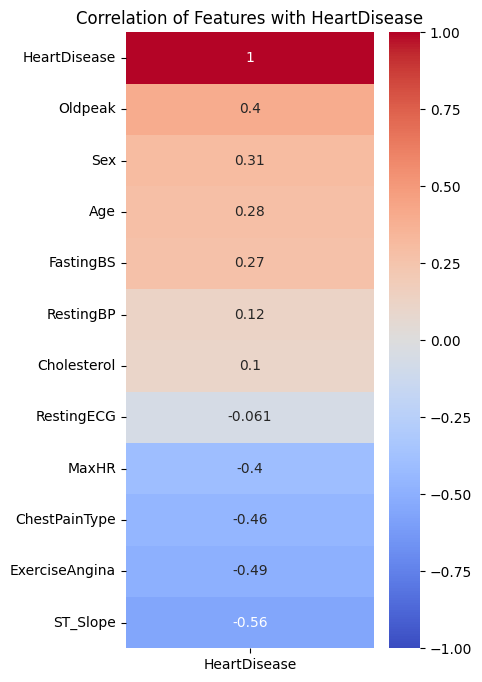

In [52]:
# sns.heatmap(index='da_final',columns='HeartDisease')
# plt.show()
# Compute correlations with HeartDisease
corr = da_final.corr(numeric_only=True)[['HeartDisease']].sort_values(
    by='HeartDisease', ascending=False
)

# Heatmap
plt.figure(figsize=(4, 8))  # taller figure so all features fit
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)

plt.title("Correlation of Features with HeartDisease")
plt.show()


In [55]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test= train_test_split(
    da_final.drop(['HeartDisease'],axis=1),
    da_final['HeartDisease'],
    test_size=0.2,
    random_state=42,
    stratify=da_final['HeartDisease']
)

In [57]:
print(x_train.shape)

(734, 11)


In [59]:
print(x_test.shape)

(184, 11)


logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [64]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# scale + logistic regression in a pipeline
lr = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)   # increase iterations
)
# lr=LogisticRegression(max_iter=1000)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_test)

print(f"LogisticRegression Score : {accuracy_score(y_test, lr_pred):.4f}")


LogisticRegression Score : 0.8641


Support Vector Machine(SVM)

In [67]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
svm=make_pipeline(
    StandardScaler(),
    SVC(kernel='linear')
)
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)

print(f"SVM f1_score :{f1_score(y_test,svm_pred,average="weighted")} ")

SVM f1_score :0.8422922535440344 


Decision Tree Classifier

Best Parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Test Accuracy: 0.8097826086956522

Classification Report:
               precision    recall  f1-score   support

         0.0       0.78      0.79      0.79        82
         1.0       0.83      0.82      0.83       102

    accuracy                           0.81       184
   macro avg       0.81      0.81      0.81       184
weighted avg       0.81      0.81      0.81       184


Confusion Matrix:
 [[65 17]
 [18 84]]


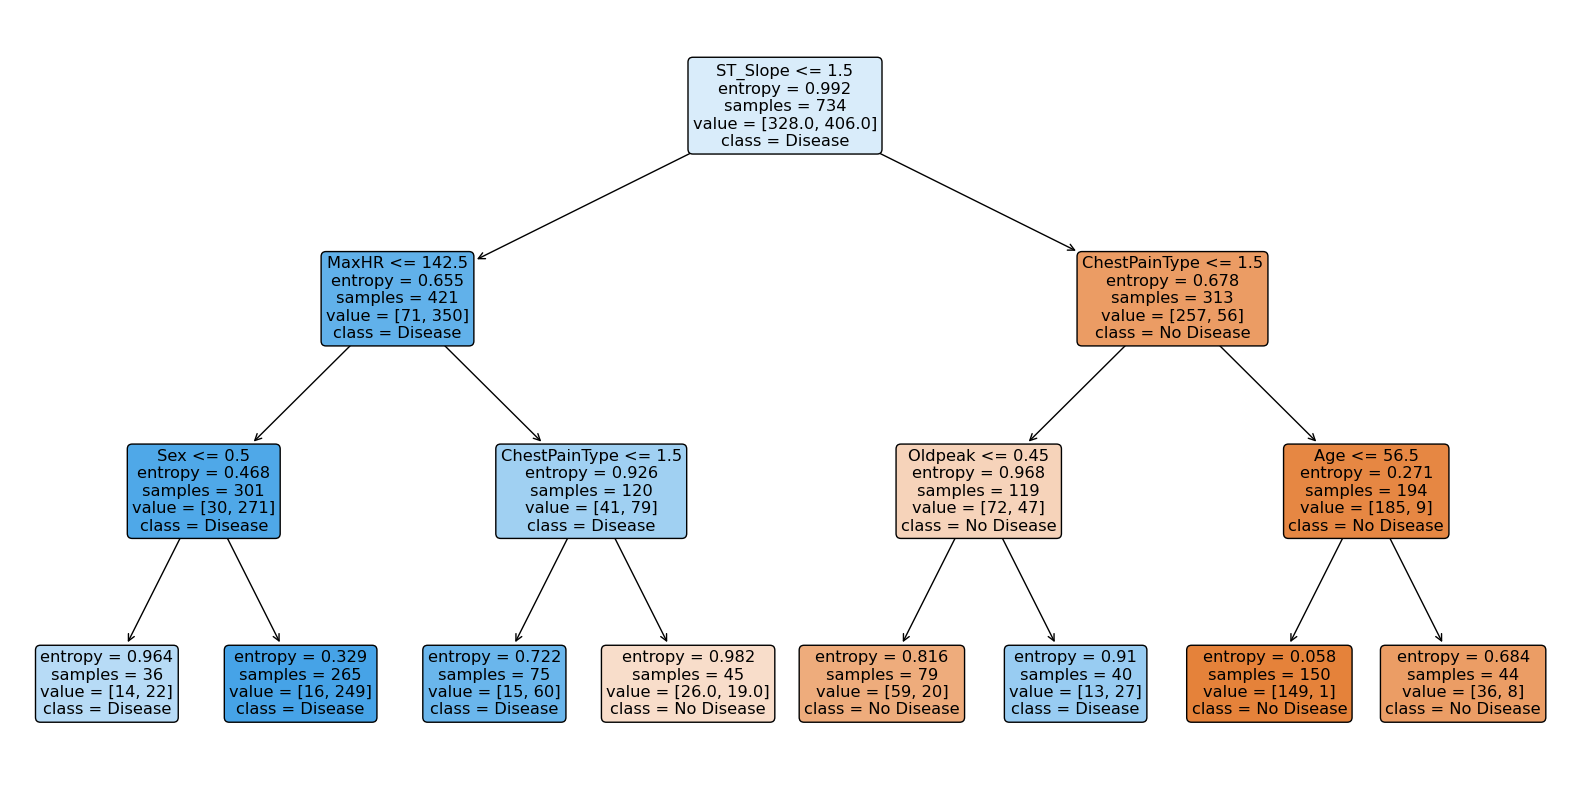

In [70]:

from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix



# Create Decision Tree
dt = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Best parameters
print("Best Parameters:", grid_search.best_params_)

# Train final model with best parameters
best_dt = grid_search.best_estimator_

# Evaluate
y_pred = best_dt.predict(x_test)
print("Test Accuracy:", best_dt.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualize the tree
plt.figure(figsize=(20,10))
plot_tree(best_dt, feature_names=x_train.columns, class_names=['No Disease','Disease'], filled=True, rounded=True)
plt.show()


In [72]:
import pickle

In [76]:
file=open('LogisticR.pkl','wb')
pickle.dump(lr,file)

In [86]:
file=open('Support_v_m.pkl','wb')
pickle.dump(svm,file)

In [92]:
file=open('Decision_tree.pkl','wb')
pickle.dump(grid_search,file)

Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200}
Test Accuracy: 0.8641304347826086

Classification Report:
               precision    recall  f1-score   support

         0.0       0.84      0.87      0.85        82
         1.0       0.89      0.86      0.88       102

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



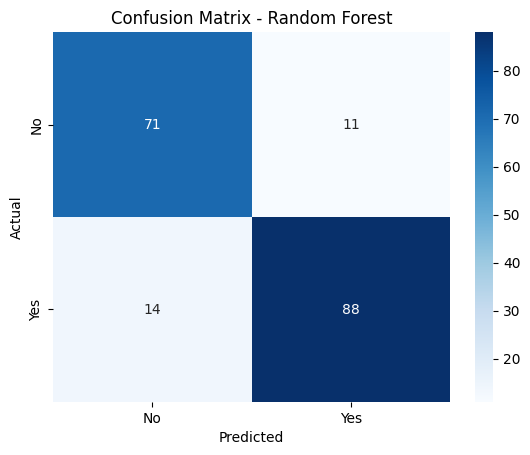

In [98]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Hyperparameter grid (use your preferred variable name)
rf_param_grid = {
    'n_estimators': [50, 100, 200],       # number of trees
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search
rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, scoring='accuracy')
rf_grid_search.fit(x_train, y_train)

# Best model
best_model = rf_grid_search.best_estimator_
print("Best Parameters:", rf_grid_search.best_params_)

# Predictions & evaluation
y_pred = best_model.predict(x_test)
print("Test Accuracy:", best_model.score(x_test, y_test))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No','Yes'], yticklabels=['No','Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


In [106]:
file=open('Random__forest.pkl','wb')
pickle.dump(rf_grid_search,file)